In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
links = pd.read_csv('../../../data/links.csv')
movies = pd.read_csv('../../../data/movies.csv')
ratings = pd.read_csv('../../../data/ratings.csv')
tags = pd.read_csv('../../../data/tags.csv')
new = pd.merge(links, movies)
new_2 = pd.merge(new, ratings)
# Drop movieId and timestamp
tags_2 = tags.drop(columns=['movieId', 'timestamp'])
df_pre = pd.merge(new_2, tags_2)
# Drop null values
df = df_pre.dropna()
# replace | with , in the genres column
df['genres'] = df['genres'].str.replace('|',' , ')

<ipython-input-2-86a63a1ab3b0>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['genres'] = df['genres'].str.replace('|',' , ')


In [3]:
df

,movieId,imdbId,tmdbId,title,genres,userId,rating,timestamp,tag
0,1,114709,862.0,Toy Story (1995),"Adventure , Animation , Children , Comedy , Fa...",7,4.5,1106635946,way too long
1,50,114814,629.0,"Usual Suspects, The (1995)","Crime , Mystery , Thriller",7,4.5,1106635993,way too long
2,58,110877,11010.0,"Postman, The (Postino, Il) (1994)","Comedy , Drama , Romance",7,3.0,1106635520,way too long
3,150,112384,568.0,Apollo 13 (1995),"Adventure , Drama , IMAX",7,4.5,1106635925,way too long
4,165,112864,1572.0,Die Hard: With a Vengeance (1995),"Action , Crime , Thriller",7,4.0,1106635987,way too long
...,...,...,...,...,...,...,...,...,...
4626861,193587,8391976,483455.0,Bungo Stray Dogs: Dead Apple (2018),"Action , Animation",184,3.5,1537110021,psychology
4626862,193587,8391976,483455.0,Bungo Stray Dogs: Dead Apple (2018),"Action , Animation",184,3.5,1537110021,anime
4626863,193587,8391976,483455.0,Bungo Stray Dogs: Dead Apple (2018),"Action , Animation",184,3.5,1537110021,comedy
4626864,193587,8391976,483455.0,Bungo Stray Dogs: Dead Apple (2018),"Action , Animation",184,3.5,1537110021,gintama


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4626858 entries, 0 to 4626865
Data columns (total 9 columns):
 #   Column     Dtype  
---  ------     -----  
 0   movieId    int64  
 1   imdbId     int64  
 2   tmdbId     float64
 3   title      object 
 4   genres     object 
 5   userId     int64  
 6   rating     float64
 7   timestamp  int64  
 8   tag        object 
dtypes: float64(2), int64(4), object(3)
memory usage: 353.0+ MB


In [5]:
df.loc[df['userId'] == 184]

,movieId,imdbId,tmdbId,title,genres,userId,rating,timestamp,tag
4622176,2579,154506,11660.0,Following (1998),"Crime , Mystery , Thriller",184,4.0,1537094293,black and white
4622177,2579,154506,11660.0,Following (1998),"Crime , Mystery , Thriller",184,4.0,1537094293,Christopher Nolan
4622178,2579,154506,11660.0,Following (1998),"Crime , Mystery , Thriller",184,4.0,1537094293,directorial debut
4622179,2579,154506,11660.0,Following (1998),"Crime , Mystery , Thriller",184,4.0,1537094293,mindfuck
4622180,2579,154506,11660.0,Following (1998),"Crime , Mystery , Thriller",184,4.0,1537094293,not linear
...,...,...,...,...,...,...,...,...,...
4626861,193587,8391976,483455.0,Bungo Stray Dogs: Dead Apple (2018),"Action , Animation",184,3.5,1537110021,psychology
4626862,193587,8391976,483455.0,Bungo Stray Dogs: Dead Apple (2018),"Action , Animation",184,3.5,1537110021,anime
4626863,193587,8391976,483455.0,Bungo Stray Dogs: Dead Apple (2018),"Action , Animation",184,3.5,1537110021,comedy
4626864,193587,8391976,483455.0,Bungo Stray Dogs: Dead Apple (2018),"Action , Animation",184,3.5,1537110021,gintama


In [6]:
# Drop duplicates
#df = df.drop_duplicates(subset=['movieId'])

In [7]:
#df

In [8]:
df.tag.value_counts()

In Netflix queue    276148
Disney               44669
religion             43360
crime                37818
superhero            30262
                     ...  
old                     24
moldy                   24
jackie chan             22
kung fu                 22
black hole              21
Name: tag, Length: 1589, dtype: int64

In [9]:
df.rating.value_counts()

3.5    1074657
4.0    1062356
3.0     853601
2.5     412794
2.0     401263
4.5     354089
5.0     157719
1.5     154027
1.0      96822
0.5      59530
Name: rating, dtype: int64

<AxesSubplot:>

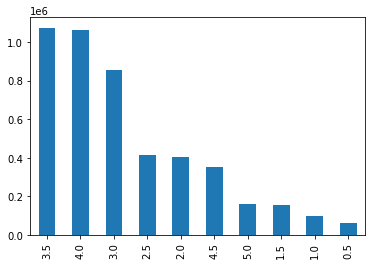

In [10]:
df.rating.value_counts().plot(kind='bar')

In [11]:
cm = df.groupby(['title']).mean().sort_values(by='rating', ascending=False)['rating'].to_dict()

In [12]:
cmcount = df['title'].value_counts(normalize=True).to_dict() 
#count of times this show up on the overall data

Text(0, 0.5, 'Weighted Rating')

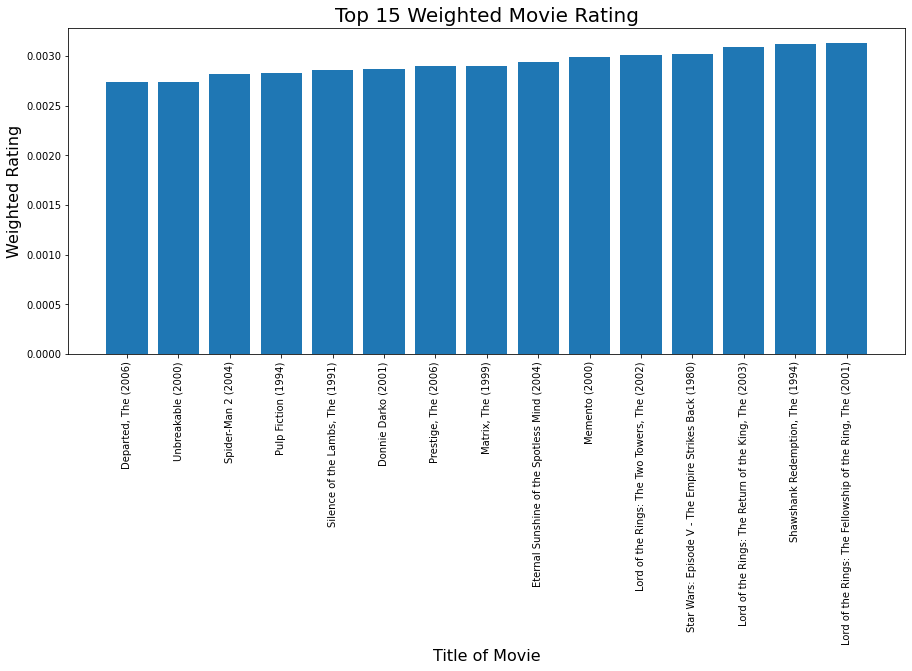

In [13]:
movie = df['title'].unique()
weighted_rating = []
for title in movie:
    count = cmcount[title]
    rating = cm[title]
    weighted_rating.append(count * rating)
sorted_vals = sorted(list(zip(weighted_rating, movie)))
x = [val[1] for val in sorted_vals]
y = [val[0] for val in sorted_vals]
plt.figure(figsize=(15,6))
plt.bar(x[-15:], y[-15:])
plt.xticks(rotation=90);
plt.title('Top 15 Weighted Movie Rating', fontsize=20)
plt.xlabel('Title of Movie', fontsize=16)
plt.ylabel('Weighted Rating', fontsize=16)

In [14]:
df['genres']

0          Adventure , Animation , Children , Comedy , Fa...
1                                 Crime , Mystery , Thriller
2                                   Comedy , Drama , Romance
3                                   Adventure , Drama , IMAX
4                                  Action , Crime , Thriller
                                 ...                        
4626861                                   Action , Animation
4626862                                   Action , Animation
4626863                                   Action , Animation
4626864                                   Action , Animation
4626865                                   Action , Animation
Name: genres, Length: 4626858, dtype: object

In [15]:
df['title'].head()

0                     Toy Story (1995)
1           Usual Suspects, The (1995)
2    Postman, The (Postino, Il) (1994)
3                     Apollo 13 (1995)
4    Die Hard: With a Vengeance (1995)
Name: title, dtype: object